<a href="https://colab.research.google.com/github/FelixDeMan/DLVU/blob/master/DL3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget
import wget, os, gzip, pickle, random, re, sys

IMDB_URL = 'http://dlvu.github.io/data/imdb.{}.pkl.gz'
IMDB_FILE = 'imdb.{}.pkl.gz'

PAD, START, END, UNK = '.pad', '.start', '.end', '.unk'

def load_imdb(final=False, val=5000, seed=0, voc=None, char=False):

    cst = 'char' if char else 'word'

    imdb_url = IMDB_URL.format(cst)
    imdb_file = IMDB_FILE.format(cst)

    if not os.path.exists(imdb_file):
        wget.download(imdb_url)

    with gzip.open(imdb_file) as file:
        sequences, labels, i2w, w2i = pickle.load(file)

    if voc is not None and voc < len(i2w):
        nw_sequences = {}

        i2w = i2w[:voc]
        w2i = {w: i for i, w in enumerate(i2w)}

        mx, unk = voc, w2i['.unk']
        for key, seqs in sequences.items():
            nw_sequences[key] = []
            for seq in seqs:
                seq = [s if s < mx else unk for s in seq]
                nw_sequences[key].append(seq)

        sequences = nw_sequences

    if final:
        return (sequences['train'], labels['train']), (sequences['test'], labels['test']), (i2w, w2i), 2

    # Make a validation split
    random.seed(seed)

    x_train, y_train = [], []
    x_val, y_val = [], []

    val_ind = set( random.sample(range(len(sequences['train'])), k=val) )
    for i, (s, l) in enumerate(zip(sequences['train'], labels['train'])):
        if i in val_ind:
            x_val.append(s)
            y_val.append(l)
        else:
            x_train.append(s)
            y_train.append(l)

    return (x_train, y_train), \
           (x_val, y_val), \
           (i2w, w2i), 2


def gen_sentence(sent, g):

    symb = '_[a-z]*'

    while True:

        match = re.search(symb, sent)
        if match is None:
            return sent

        s = match.span()
        sent = sent[:s[0]] + random.choice(g[sent[s[0]:s[1]]]) + sent[s[1]:]

def gen_dyck(p):
    open = 1
    sent = '('
    while open > 0:
        if random.random() < p:
            sent += '('
            open += 1
        else:
            sent += ')'
            open -= 1

    return sent

def gen_ndfa(p):

    word = random.choice(['abc!', 'uvw!', 'klm!'])

    s = ''
    while True:
        if random.random() < p:
            return 's' + s + 's'
        else:
            s+= word

def load_brackets(n=50_000, seed=0):
    return load_toy(n, char=True, seed=seed, name='dyck')

def load_ndfa(n=50_000, seed=0):
    return load_toy(n, char=True, seed=seed, name='ndfa')

def load_toy(n=50_000, char=True, seed=0, name='lang'):

    random.seed(0)

    if name == 'lang':
        sent = '_s'

        toy = {
            '_s': ['_s _adv', '_np _vp', '_np _vp _prep _np', '_np _vp ( _prep _np )', '_np _vp _con _s' , '_np _vp ( _con _s )'],
            '_adv': ['briefly', 'quickly', 'impatiently'],
            '_np': ['a _noun', 'the _noun', 'a _adj _noun', 'the _adj _noun'],
            '_prep': ['on', 'with', 'to'],
            '_con' : ['while', 'but'],
            '_noun': ['mouse', 'bunny', 'cat', 'dog', 'man', 'woman', 'person'],
            '_vp': ['walked', 'walks', 'ran', 'runs', 'goes', 'went'],
            '_adj': ['short', 'quick', 'busy', 'nice', 'gorgeous']
        }

        sentences = [ gen_sentence(sent, toy) for _ in range(n)]
        sentences.sort(key=lambda s : len(s))

    elif name == 'dyck':

        sentences = [gen_dyck(7./16.) for _ in range(n)]
        sentences.sort(key=lambda s: len(s))

    elif name == 'ndfa':

        sentences = [gen_ndfa(1./4.) for _ in range(n)]
        sentences.sort(key=lambda s: len(s))

    else:
        raise Exception(name)

    tokens = set()
    for s in sentences:

        if char:
            for c in s:
                tokens.add(c)
        else:
            for w in s.split():
                tokens.add(w)

    i2t = [PAD, START, END, UNK] + list(tokens)
    t2i = {t:i for i, t in enumerate(i2t)}

    sequences = []
    for s in sentences:
        if char:
            tok = list(s)
        else:
            tok = s.split()
        sequences.append([t2i[t] for t in tok])

    return sequences, (i2t, t2i)

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=834758866fa91dc231077c439bcfc1f02dd2de5b36115076960dde21e1169222
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


sklm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!s
['.pad', '.start', '.end', '.unk', '!', 'c', 'w', 'k', 'a', 's', 'v', 'm', 'u', 'l', 'b']
Training on: cpu
recurNet(
  (layer1): Embedding(15, 32)
  (layer2): LSTM(32, 16, num_layers=3, batch_first=True)
  (layer3): Linear(in_features=16, out_features=15, bias=True)
)
[1,     1] loss: 0.093 
[1,    51] loss: 3.066 
[1,   101] loss: 2.902 
[1,   151] loss: 3.133 
[1,   201] loss: 2.666 
[1,   251] loss: 2.899 
Epoch took: 13.750753457999963s
[2,     1] loss: 0.867 
[2,    51] loss: 2.817 
[2,   101] loss: 2.847 
[2,   151] loss: 3.119 
[2,   201] loss: 2.652 
[2,   251] loss: 2.887 
Epoch took: 13.524248518000036s
[3,     1] loss: 0.865 
[3,    51] loss: 2.810 
[3,   101] loss: 2.842 
[3,   151] loss: 3.114 
[3,   201] loss: 2.649 
[3,   251] loss: 2.882 
Epoch took: 13.487659109999981s
[4,     1] loss: 0.863 
[4,    51] loss: 2.804 
[4,   101] loss: 2.837 
[4,   151] loss: 3.108 
[4,   201] loss: 2.643 
[4,   251] l

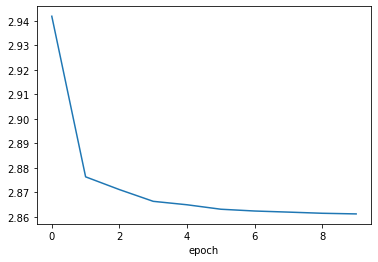

In [ ]:

from collections import defaultdict
from multiprocessing.context import assert_spawning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import numpy as np


np.random.seed(10)

MAX_CHARS_PER_BATCH = 10000

def prepare_batches(x_train, i2w, w2i):
    dict_size = len(i2w)
    
    # w2i['.pad'] = 0
    pad_val = w2i['.pad']
    # w2i['.start'] = 1
    start_val = w2i['.start']
    # w2i['.end'] = 2
    end_val = w2i['.end']

    for x in x_train:
        x.insert(0, start_val)
        x.append(end_val)

    sizes = defaultdict(list)
    for x in x_train:
        sizes[len(x)].append(x)

    t_sizes = dict()
    for k, v in sizes.items():
        t_sizes[k] = torch.tensor(v, dtype=torch.long)
    
    batches = []
    for _, x_tensor in t_sizes.items():
        x_tensor_len, n_chars = x_tensor.shape
        start_pad = start_val * torch.ones(x_tensor_len, dtype=torch.long)
        
        shifted_input = x_tensor[:, 2:-1]
        zeros = torch.zeros(x_tensor_len, dtype=torch.long)
        end_pad = end_val * torch.ones(x_tensor_len, dtype=torch.long)
        y_tensor = torch.column_stack(
            [start_pad.T,shifted_input, zeros.T, end_pad.T]         
        )

        assert x_tensor.shape == y_tensor.shape

        batch_size = MAX_CHARS_PER_BATCH // n_chars
        x_batches = torch.split(x_tensor, batch_size)
        y_batches = torch.split(y_tensor, batch_size)
        
        # TODO probably there is a smarter way to do one hots over the whole dict
        y_oh_batches = list()
        for y in y_batches:
            b, chrs = y.shape
            one_hots = torch.zeros(b,chrs, dict_size, dtype=torch.long)
            for bi in range(y.shape[0]):
                y_one_hot = torch.zeros(chrs, dict_size, dtype=torch.long)
                for el in range(chrs):
                    y_one_hot[el][y[bi,el]] = 1
                one_hots[bi, :, :] = y_one_hot
            y_oh_batches.append(one_hots)
        assert len(x_batches) == len(y_oh_batches)
        batches.extend(list(zip(x_batches, y_oh_batches)))
    np.random.shuffle(batches)
    return batches

class recurNet(nn.Module):

    def __init__(self, embedding_dim = 32, hidden_size = 16, vocab_size = 15, num_layers=3):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.layer1 = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embedding_dim)

        self.layer2 = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_size, num_layers=num_layers, batch_first=True)
        
        self.layer3 = nn.Linear(hidden_size, vocab_size)

    def forward(self, input):
        # b, n_chrs = input.shape
        emb = self.layer1(input)
        
        # assert emb.shape == (b, n_chrs, self.embedding_dim)
                    
        lstm, (hn, cn) = self.layer2(emb)

        # assert lstm.shape == (b, n_chrs, self.hidden_size)
        output = self.layer3(lstm)
        # assert output.shape == (b, n_chrs, self.vocab_size)

        return output

def train(epochs, batches, device):
    net = recurNet()
    print(net)
    net.to(device)
    criterion = nn.CrossEntropyLoss(reduction='sum')
    optimizer = optim.Adam(net.parameters(), lr = 0.01)
    
    running_loss = 0
    losses =[]
    data = list()
    for epoch in range(epochs):
        ts = time.perf_counter()
        for i, (x,one_hots) in enumerate(batches):
            x, one_hots = x.to(device), one_hots.to(device)
            
            optimizer.zero_grad()

            out = net(x).softmax(dim=1)
            
            # print(f'{out.shape}=')
            # print(f'{one_hots.shape}=')

            loss = criterion(out, one_hots.type(torch.float32))
            
            # divide by batch and # of tokens
            loss /= one_hots.shape[0]* one_hots.shape[1]
            
            loss.backward()

            optimizer.step()
            running_loss += loss.item()
            losses.append(loss.item()) 
            if i % 50 == 0: #print every 1000 batches
                print('[%d, %5d] loss: %.3f ' %
                    (epoch +1, i+1, running_loss / 50))
                running_loss = 0.0
            data.append({'update' : i, 'epoch': epoch, 'loss': loss.item()})
        print(f'Epoch took: {time.perf_counter()-ts}s')
    print('Finished training')
    return losses, data,net


# %%
x_train, (i2w, w2i) = load_ndfa(n=150_000)
print(''.join([i2w[i] for i in    x_train[149_000]]) )
print(i2w)

batches = prepare_batches(x_train, i2w, w2i)



if torch.cuda.is_available():
    device = torch.device('cuda') 
else:
    device = torch.device('cpu') 

print(f'Training on: {device}', flush=True)

# %%
losses, data, net = train(10, batches, device)

import pandas as pd
df = pd.DataFrame(data)
df.groupby(by='epoch').mean()
# %%
df.groupby(by='epoch').mean()['loss'].plot()
# %%


    
def evaluate(net, batches):
    import random
    i = random.choice(list(range(len(batches))))
    batch = batches[i]
    with torch.no_grad():
        out = net(batch)
        n



In [ ]:
x_train, (i2w, w2i) = load_ndfa(n=150_000)

In [ ]:
print(''.join([i2w[i] for i in  x_train[149_000]]) )

sklm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!s


In [ ]:
len(i2w)

15

In [ ]:
from collections import defaultdict



In [ ]:
import torch


In [ ]:
print(i2w)

['.pad', '.start', '.end', '.unk', '!', 'v', 'm', 'c', 'a', 'k', 'b', 'l', 'w', 'u', 's']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# w2i['.pad'] = 0
pad_val = 0
# w2i['.start'] = 1
start_val = 1
# w2i['.end'] = 2
end_val = 2


for x in x_train:
  x.insert(0, start_val)
  x.append(end_val)

t_sizes = defaultdict(list)
for x in x_train:
  t_sizes[len(x)].append(x)

t = dict()
for k, v in t_sizes.items():
  t_sizes[k] = torch.tensor(v, dtype=torch.long)

In [ ]:
t_sizes.keys()

dict_keys([6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98, 102, 106, 110, 114, 118, 122, 126, 130, 134, 138, 150, 158, 162])

In [ ]:
import numpy as np

max_els_per_batch = 1000

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    return [lst[i:i + n] for i in range(0, len(lst), n)]

batches = []
for _, x_tensor in t_sizes.items():
  x_tensor_len, n_chars = x_tensor.shape
  y_tensor = torch.column_stack(
      [
        x_tensor[:, 1:], 
        torch.zeros(x_tensor_len).T
      ] 
  )

  batch_size = max_els_per_batch // n_chars
  x_batches = torch.split(x_tensor, batch_size)
  y_batches = torch.split(x_tensor, batch_size)
  
  batches.extend(list(zip(x_batches, y_batches)))
np.random.shuffle(batches)

AttributeError: ignored

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class recurNet(nn.Module):

    def __init__(self):
      super().__init__()
      embedding_dim = 32
      hidden_size = 16
      #len(i2w) = 15
      vocab_size = 15

      self.layer1 = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embedding_dim)

      self.layer2 = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_size, num_layers=1, batch_first=True)
      
      self.layer3 = nn.Linear(hidden_size, vocab_size)

    def forward(self, input):
      emb = self.layer1(input)

      lstm, (hn, cn) = self.layer2(emb)

      output = self.layer3(lstm)

      return output

net = recurNet()
print(net)
net.to(device)

In [ ]:
def train(epochs, model, GPU, batches):
  import torch.optim as optim
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.0)
  running_loss = 0
  losses =[]
  for epoch in range(epochs):
    for i, (x,y) in enumerate(batches):
      if GPU:
        x, y = x.to(device), y.to(device)
      
      optimizer.zero_grad()

      out = model(x)
      
      print(out.shape)
      print(y.shape)
      
      
      #for i in y.shape[0]:
        
      #  y_one_hot = torch.zeros(y.shape[1], 15)

      
      #print(y_one_hot.shape)


      #print(y.shape)
      loss = F.cross_entropy(out, y, reduction='sum')

      loss.backward()

      optimizer.step()
      running_loss += loss.item()
      losses.append(loss.item()) 
      if i % 3 == 2: #print every 1000 batches
        print('[%d, %5d] loss: %.3f ' %
          (epoch +1, i+1, running_loss / 3))
        running_loss = 0.0
  print('Finished training')
  return losses


In [ ]:
train(1, net, False, batches)

torch.Size([31, 32, 15])
torch.Size([31, 32])


RuntimeError: ignored

In [ ]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
  print(
      'yes'
  )
else:  
  dev = "cpu"  
device = torch.device(dev) 

In [ ]:
sizes[2]

 ex7


In [ ]:
x_train, (i2w, w2i) = load_ndfa(n=150_000)
print(''.join([i2w[i] for i in    x_train[149_000]]) )
print(i2w)

batches = prepare_batches(x_train, i2w, w2i)



sklm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!klm!s
['.pad', '.start', '.end', '.unk', '!', 'c', 'w', 'k', 'a', 's', 'v', 'm', 'u', 'l', 'b']


In [ ]:
# %%
from collections import defaultdict
from multiprocessing.context import assert_spawning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import time
import numpy as np


np.random.seed(10)

MAX_CHARS_PER_BATCH = 10000

def prepare_batches(x_train, i2w, w2i):
    dict_size = len(i2w)
    
    # w2i['.pad'] = 0
    pad_val = w2i['.pad']
    # w2i['.start'] = 1
    start_val = w2i['.start']
    # w2i['.end'] = 2
    end_val = w2i['.end']

    for x in x_train:
        x.insert(0, start_val)
        x.append(end_val)

    sizes = defaultdict(list)
    for x in x_train:
        sizes[len(x)].append(x)

    t_sizes = dict()
    for k, v in sizes.items():
        t_sizes[k] = torch.tensor(v, dtype=torch.long)
    
    batches = []
    for _, x_tensor in t_sizes.items():
        x_tensor_len, n_chars = x_tensor.shape
        start_pad = start_val * torch.ones(x_tensor_len, dtype=torch.long)
        
        shifted_input = x_tensor[:, 2:-1]
        zeros = torch.zeros(x_tensor_len, dtype=torch.long)
        end_pad = end_val * torch.ones(x_tensor_len, dtype=torch.long)
        y_tensor = torch.column_stack(
            [start_pad.T,shifted_input, zeros.T, end_pad.T]         
        )

        assert x_tensor.shape == y_tensor.shape

        batch_size = MAX_CHARS_PER_BATCH // n_chars
        x_batches = torch.split(x_tensor, batch_size)
        y_batches = torch.split(y_tensor, batch_size)
        
        # TODO probably there is a smarter way to do one hots over the whole dict
        y_oh_batches = list()
        for y in y_batches:
            b, chrs = y.shape
            one_hots = torch.zeros(b,chrs, dict_size, dtype=torch.long)
            for bi in range(y.shape[0]):
                y_one_hot = torch.zeros(chrs, dict_size, dtype=torch.long)
                for el in range(chrs):
                    y_one_hot[el][y[bi,el]] = 1
                one_hots[bi, :, :] = y_one_hot
            y_oh_batches.append(one_hots)
        assert len(x_batches) == len(y_oh_batches)
        batches.extend(list(zip(x_batches, y_oh_batches)))
    np.random.shuffle(batches)
    return batches

class recurNet(nn.Module):

    def __init__(self, embedding_dim = 32, hidden_size = 16, vocab_size = 15, num_layers=3):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.layer1 = nn.Embedding(num_embeddings = vocab_size, embedding_dim = embedding_dim)

        self.layer2 = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_size, num_layers=num_layers, batch_first=True)
        
        self.layer3 = nn.Linear(hidden_size, vocab_size)

    def forward(self, input):
        # b, n_chrs = input.shape
        emb = self.layer1(input)
        
        # assert emb.shape == (b, n_chrs, self.embedding_dim)
                    
        lstm, (hn, cn) = self.layer2(emb)

        # assert lstm.shape == (b, n_chrs, self.hidden_size)
        output = self.layer3(lstm)
        # assert output.shape == (b, n_chrs, self.vocab_size)

        return output

def train(epochs, batches, device):
    net = recurNet()
    print(net)
    net.to(device)
    criterion = nn.CrossEntropyLoss(reduction='sum')
    optimizer = optim.Adam(net.parameters(), lr = 0.01)
    
    end_val = w2i['.end']
    samples, i2w_samples, samples_epoch = [], [], []
    running_loss = 0
    losses =[]
    data = list()
    for epoch in range(epochs):
        ts = time.perf_counter()
        for i, (x,one_hots) in enumerate(batches):
            
            x, one_hots = x.to(device), one_hots.to(device)
            
            
            optimizer.zero_grad()

            out = net(x)#.softmax(dim=1)  #softmax applied in CrossEntropyLoss
            
            # print(f'{out.shape}=')
            # print(f'{one_hots.shape}=')

            loss = criterion(out, one_hots.type(torch.float32)) 
            
            # divide by batch and # of tokens
            loss /= one_hots.shape[0]* one_hots.shape[1]
            
            loss.backward()

            optimizer.step()
            running_loss += loss.item()
            losses.append(loss.item()) 
            if i % 50 == 0: #print every 1000 batches
                print('[%d, %5d] loss: %.3f ' %
                    (epoch +1, i+1, running_loss / 50))
                running_loss = 0.0
            data.append({'update' : i, 'epoch': epoch, 'loss': loss.item()})
        print(f'Epoch took: {time.perf_counter()-ts}s')
        
        
        print('Now generating 10 samples')
        for i in range(10):
          seed =  [w2i['.start'], w2i['s']]
          seed = (torch.LongTensor(seed))
          seed = seed.reshape(1, seed.shape[0])

          
          out = net(seed)
         
          out = out[:, -1, :].reshape(1,1,15)
          
          nextToken = sample(out[:,-1,:]).reshape(1,1)
         

          seed = torch.cat((seed,nextToken), dim = 1)
         


          while end_val not in nextToken:
            out = net(seed)
            out = out[:, -1, :].reshape(1,1,15)
            
            nextToken = sample(out)
            seed = torch.cat((seed, nextToken), dim = 1)
          print(seed)
          samples.append(seed)
          samples_epoch.append(seed)
          i2w_sample = [i2w[i] for i in seed[0]]
          #print(i2w_sample)
          i2w_samples.append(i2w_sample)
        print('Accuracy = ', eval_ndfa(samples_epoch))
        samples_epoch = []

          

    print('Finished training')
    return losses, data,net, samples


# %%


if torch.cuda.is_available():
    device = torch.device('cuda') 
else:
    device = torch.device('cpu') 

print(f'Training on: {device}', flush=True)

# %%
losses, data, net, samples = train(10, batches, device)

import pandas as pd
df = pd.DataFrame(data)
df.groupby(by='epoch').mean()
# %%
df.groupby(by='epoch').mean()['loss'].plot()
# %%


    
def evaluate(net, batches):
    import random
    i = random.choice(list(range(len(batches))))
    batch = batches[i]
    with torch.no_grad():
        out = net(batch)
        




Streaming output truncated to the last 5000 lines.
          8, 14,  5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  8, 14,
          5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  8, 14,  5,  4,
          8, 14,  5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  8, 14,
          5,  4,  8, 14,  5,  4,  8, 14,  5,  4,  9,  2]])
tensor([[ 1,  9, 12,  ...,  4,  9,  2],
        [ 1,  9,  7,  ...,  4,  9,  2],
        [ 1,  9,  7,  ...,  4,  9,  2],
        ...,
        [ 1,  9,  7,  ...,  4,  9,  2],
        [ 1,  9,  7,  ...,  4,  9,  2],
        [ 1,  9,  7,  ...,  4,  9,  2]])
tensor([[ 1,  9, 12,  ...,  4,  9,  2],
        [ 1,  9,  7,  ...,  4,  9,  2],
        [ 1,  9, 12,  ...,  4,  9,  2],
        ...,
        [ 1,  9, 12,  ...,  4,  9,  2],
        [ 1,  9,  8,  ...,  4,  9,  2],
        [ 1,  9,  8,  ...,  4,  9,  2]])
tensor([[ 1,  9,  7,  ...,  4,  9,  2],
        [ 1,  9,  7,  ...,  4,  9,  2],
        [ 1,  9, 12,  ...,  4,  9,  2],
        ...,
      

KeyboardInterrupt: ignored

In [ ]:
def eval_ndfa(samples):
  words = (['abc!', 'uvw!', 'klm!'])
  abc = [w2i[x] for x in words[0]]
  uvw =  [w2i[x] for x in words[1]]
  klm =  [w2i[x] for x in words[2]]
  words = [abc, uvw, klm]
 
  correct = 0
  for sample in samples:
    
    sample =sample[0].tolist()
    
    # Delete .start and .end
    sample.pop(0)
    
    sample.pop(-1)

    if sample[0] != w2i['s'] or sample[-1] != w2i['s']:
      print('Not start / end with s')
      continue
    
    if w2i['.unk'] in sample or w2i['.start'] in sample:
      print('unk or start in middle')
      continue
    
    # First and last element MUST BE s at this point, delete them:
    
    if(len(sample) < 2): continue
    sample.pop(0)
    
    sample.pop(-1)

    if(len(sample) == 0): 
      correct += 1
      continue

    if w2i['s'] in sample:
      print('rogue s spotted')
      continue
    
    if len(sample) % 4 != 0:
      print('words not % 4')
      continue

    if sample[0:4] == words[0]:
      while len(sample) >= 4:
        sample = delete_by_indices(sample, [0,1,2,3])
      
        if len(sample) == 0: 
          correct += 1
          continue

        if sample[0:4] != words[0]:
          print('different word 0 or sth')
          continue 

    if sample[0:4] == words[1]:
      while len(sample) >= 4:
        sample = delete_by_indices(sample, [0,1,2,3])
        if len(sample) == 0:
           correct += 1
           continue

        if sample[0:4] != words[1]:
          print('different word 1 or sth')
          continue 

    if sample[0:4] == words[2]:
      while len(sample) >= 4:
        sample = delete_by_indices(sample, [0,1,2,3])
       
        if len(sample) == 0:
           correct += 1
           continue

        if sample[0:4] != words[2]:
          print('different word or sth')
          continue 

   

  accuracy = correct / len(samples[0])
  
  return accuracy



def delete_by_indices(lst, indices):
    indices_as_set = set(indices)
    return [ lst[i] for i in range(len(lst)) if i not in indices_as_set ]


In [ ]:
testinggg = [[[1, 9, 9, 2],[1,4,6,2]]]
testfr = [[[1, 9, 9, 2], [1, 4, 6, 2], [1,9, 9,2], [1,9, 9,2], [1,9, 8, 14, 5, 4, 9,2], [1,9, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 9,2], [1,9, 12, 10, 6, 4, 12, 10, 6, 4, 12, 10, 6, 4, 9,2], [1,9, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 8, 14, 5, 4, 9,], [1,9, 9, 2], [1,9, 9, 2], [1,9, 9,2], [1,9, 9,2]]]
#print(samples)

#for i in range (10):
#  testinggg.append([w2i[x] for x in gen_ndfa(0.25)])
#print(testinggg)
eval_ndfa(samples)

[1, 9, 0, 12, 12, 4, 6, 9, 3, 5, 9, 11, 14, 11, 4, 4, 11, 13, 5, 14, 6, 8, 10, 13, 6, 5, 3, 14, 2]
[9, 0, 12, 12, 4, 6, 9, 3, 5, 9, 11, 14, 11, 4, 4, 11, 13, 5, 14, 6, 8, 10, 13, 6, 5, 3, 14, 2]
Not start / end with s
[1, 9, 10, 9, 10, 13, 8, 6, 10, 12, 12, 3, 4, 14, 10, 2]
[9, 10, 9, 10, 13, 8, 6, 10, 12, 12, 3, 4, 14, 10, 2]
Not start / end with s
[1, 9, 13, 13, 11, 9, 6, 0, 1, 11, 11, 4, 9, 6, 7, 2]
[9, 13, 13, 11, 9, 6, 0, 1, 11, 11, 4, 9, 6, 7, 2]
Not start / end with s
[1, 9, 4, 2]
[9, 4, 2]
Not start / end with s
[1, 9, 11, 10, 11, 10, 9, 4, 10, 1, 10, 0, 9, 3, 0, 2]
[9, 11, 10, 11, 10, 9, 4, 10, 1, 10, 0, 9, 3, 0, 2]
Not start / end with s
[1, 9, 5, 5, 9, 2]
[9, 5, 5, 9, 2]
[9, 5, 5, 9]
[5, 5, 9]
words not % 4
[1, 9, 2]
[9, 2]
[9]
[1, 9, 10, 8, 2]
[9, 10, 8, 2]
Not start / end with s
[1, 9, 9, 9, 2]
[9, 9, 9, 2]
[9, 9, 9]
[9, 9]
rogue s spotted
[1, 9, 2]
[9, 2]
[9]
[1, 9, 12, 0, 4, 10, 1, 8, 8, 5, 5, 3, 12, 3, 8, 6, 6, 4, 5, 0, 11, 2]
[9, 12, 0, 4, 10, 1, 8, 8, 5, 5, 3, 12, 3, 

0.0

In [ ]:
net()

In [ ]:
import torch.distributions as dist 

def sample(lnprobs, temperature=1.0):


  if temperature == 0.0:
    return lnprobs.argmax()
  p = F.softmax(lnprobs / temperature, dim=0)
  cd = dist.Categorical(p)
  
  return cd.sample()

In [ ]:
def isValid(s):
  d={'(':')','{':'}','[':']'}
  stack=[]
  opening= list(d.keys()) # ( { [
  closing=list(d.values()) # ) } ]
  for c in s:
    if c in opening:
      stack.append(c)
    elif c in closing:
      if stack==[] or d[stack.pop()]!=c:
        return False
  return(stack==[])

In [ ]:
bracket = [gen_dyck(5./14.) for i in range(100)]
for i in range(100):
  print(isValid(bracket[i]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
